<a href="https://colab.research.google.com/github/niveth-n/Equity-signal-framework/blob/main/notebooks/archival_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!rm -rf equity-signal-framework
!git clone https://github.com/niveth-n/equity-signal-framework.git
%cd equity-signal-framework


Cloning into 'equity-signal-framework'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 89 (delta 32), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (89/89), 74.37 KiB | 5.31 MiB/s, done.
Resolving deltas: 100% (32/32), done.
/content/equity-signal-framework/equity-signal-framework/equity-signal-framework



# Archival Results — Full Pipeline (Read-Only)

**CV/OOF Accuracy:** 61.25% (N≈293905; 95% MoE ±0.18%)  
**30-day OOS:** 2025-07-01 → 2025-07-31 — **Strategy 517.99%** vs **Buy-&-Hold 88.83%**

Config & integrity notes in `results/archival/`.


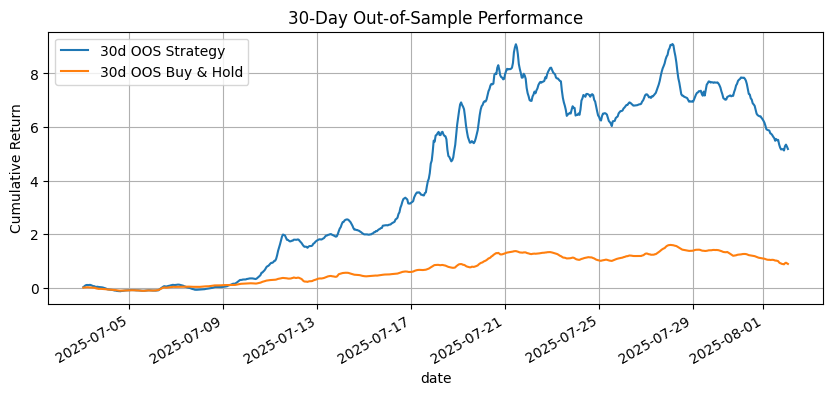

In [4]:
import csv, os
from IPython.display import Markdown, display, Image

# Load CV report (metric,value)
cv = {}
with open("results/archival/cv_report.csv") as f:
    for row in csv.DictReader(f):
        cv[row["metric"]] = row["value"]

# Load OOS metrics (single row)
with open("results/archival/oos_30d_metrics.csv") as f:
    oos = next(csv.DictReader(f))

md = f"""
# Archival Results — Full Pipeline (Read-Only)

**CV/OOF Accuracy:** {cv.get('accuracy_percent')}% (N≈{cv.get('events')}; 95% MoE ±{cv.get('moe95_percent')}%)
**30-day OOS:** {oos['start_date']} → {oos['end_date']} — **Strategy {oos['strategy_return_percent']}%** vs **Buy-&-Hold {oos['buyhold_return_percent']}%**

Config & integrity notes in `results/archival/`.
"""
display(Markdown(md))

# Show plots
display(Image("results/archival/equity_curve.png"))
if os.path.exists("results/archival/confusion_matrix.png"):
    display(Image("results/archival/confusion_matrix.png"))
